<a href="https://colab.research.google.com/github/sanaeaba/Recommende_system_coursera/blob/master/MLP_and_DeepFM_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("merged_coursera_datase.csv")
df= df.drop(columns=['Unnamed: 0'])
course_encoder = LabelEncoder()
user_encoder = LabelEncoder()

df['course_id'] = course_encoder.fit_transform(df.course_id)
df['user_id'] = user_encoder.fit_transform(df.user_id)
df['Sentiment'] = course_encoder.fit_transform(df.Sentiment)
df['course_difficulty'] = user_encoder.fit_transform(df.course_difficulty)
df.head()

,course_id,user_id,rating,Sentiment,course_difficulty
0,289,8507,2,2,3
1,289,15643,2,1,3
2,289,3474,2,0,3
3,289,7221,3,2,3
4,289,8776,3,2,3


In [ ]:
X=df[['course_id', 'user_id','Sentiment','course_difficulty']]
y=df['rating']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(16,8),
                    max_iter=50,
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.1)

# Fit data onto the model
history_model= clf.fit(X_train,y_train)

Iteration 1, loss = 1.56056337
Iteration 2, loss = 0.90201485
Iteration 3, loss = 0.90246077
Iteration 4, loss = 0.90207073
Iteration 5, loss = 0.90387877


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

In [ ]:
!pip install recmetrics
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 2.8 MB/s 
     |████████████████████████████████| 13.2 MB 21.6 MB/s 
     |████████████████████████████████| 793 kB 59.3 MB/s 
     |████████████████████████████████| 1.6 MB 48.8 MB/s 
     |████████████████████████████████| 120 kB 59.1 MB/s 
     |████████████████████████████████| 959 kB 43.6 MB/s 
     |████████████████████████████████| 209 kB 37.4 MB/s 
     |████████████████████████████████| 298 kB 59.6 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 235 kB 60.0 MB/s 
     |████████████████████████████████| 140 kB 55.7 MB/s 
     |████████████████████████████████| 48 kB 5.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 
     |████████████████████████████████| 4.0 MB 40.8 MB/s 
     |████████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import recmetrics
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, ypred)
print("MAE: ", MAE)
print("MSE: ", recmetrics.mse(y_test,ypred))
print("RMSE: ", recmetrics.rmse(y_test,ypred))

MAE:  0.48189691892659375
MSE:  1.0756779781343178
RMSE:  1.0371489662214959


# **DeepFM**

In [ ]:
!pip install deepctr_torch
!pip install fast-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from fast_ml.model_development import train_valid_test_split
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, BatchNormalization,concatenate,Multiply,Dot,Reshape
from keras.models import Model, Sequential

data = pd.read_csv('merged_coursera_datase.csv')
data

,course_id,user_id,rating,Sentiment,course_difficulty
0,289,8507,2,0,0
1,289,15643,2,1,0
2,289,3474,2,2,0
3,289,7221,3,0,0
4,289,8776,3,0,0
...,...,...,...,...,...
20117,210,1060,4,0,2
20118,210,4906,4,0,2
20119,210,838,4,2,2
20120,210,695,4,0,2


In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
course_encoder = LabelEncoder()
user_encoder = LabelEncoder()
#Data encoder
data['course_id'] = course_encoder.fit_transform(data.course_id)
data['user_id'] = user_encoder.fit_transform(data.user_id)
data['Sentiment'] = user_encoder.fit_transform(data.Sentiment)
data['course_difficulty'] = course_encoder.fit_transform(data.course_difficulty)
data

,course_id,user_id,rating,Sentiment,course_difficulty
0,289,8507,2,0,0
1,289,15643,2,1,0
2,289,3474,2,2,0
3,289,7221,3,0,0
4,289,8776,3,0,0
...,...,...,...,...,...
20117,210,1060,4,0,2
20118,210,4906,4,0,2
20119,210,838,4,2,2
20120,210,695,4,0,2


from matplotlib import pyplot as plt
data['course_id'].plot(kind='hist', bins=20, title='course_id')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
data['user_id'].plot(kind='hist', bins=20, title='user_id')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
data['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
data['Sentiment'].plot(kind='hist', bins=20, title='Sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
data.plot(kind='scatter', x='course_id', y='user_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
data.plot(kind='scatter', x='user_id', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
data.plot(kind='scatter', x='rating', y='Sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
data.plot(kind='scatter', x='Sentiment', y='course_difficulty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
data['course_id'].plot(kind='line', figsize=(8, 4), title='course_id')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
data['user_id'].plot(kind='line', figsize=(8, 4), title='user_id')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
data['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

from matplotlib import pyplot as plt
data['Sentiment'].plot(kind='line', figsize=(8, 4), title='Sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

In [ ]:
num_users = len(data.user_id.unique())
num_courses = len(data.course_id.unique())
num_sentiment = len(data.Sentiment.unique())
num_course_difficulty = len(data.course_difficulty.unique())
#splitting data
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = 'rating', train_size=0.7, valid_size=0.1, test_size=0.2)

In [ ]:
user_id_input = Input(shape=[1], name='user')
item_id_input = Input(shape=[1], name='item')
sentiment_input = Input(shape=[1], name='sentiment')
course_difficulty_input = Input(shape=[1], name='course_difficulty')

# DeepFM Embeddings

embedding_size = 16
user_embedding = Embedding(output_dim=embedding_size, input_dim=num_users, name='user_embedding')(user_id_input)
item_embedding = Embedding(output_dim=embedding_size, input_dim=num_courses, name='item_embedding')(item_id_input)
sentiment_embedding = Embedding(output_dim=embedding_size, input_dim=num_sentiment, name='sentiment_embedding')(sentiment_input)
course_difficulty_embedding = Embedding(output_dim=embedding_size, input_dim=num_course_difficulty, name='course_difficulty_embedding')(course_difficulty_input)

user_vecs = Reshape([embedding_size])(user_embedding)
item_vecs = Reshape([embedding_size])(item_embedding)
sentiment_vecs = Reshape([embedding_size])(sentiment_embedding)
course_difficulty_vecs = Reshape([embedding_size])(course_difficulty_embedding)


input_vecs = concatenate([user_vecs, item_vecs,sentiment_vecs,course_difficulty_vecs])
x = Dense(128, activation='relu')(input_vecs)

# Final prediction
y = Dense(1)(x)

model = Model(inputs=[user_id_input, item_id_input,sentiment_input, course_difficulty_input], outputs=y)
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='mse')


In [ ]:
from keras.callbacks import ModelCheckpoint

mcheck = ModelCheckpoint('val_loss'  , monitor='val_loss', save_best_only=True)

history = model.fit([X_train.user_id, X_train.course_id, X_train.Sentiment, X_train.course_difficulty], y_train, epochs=20
                    , validation_data=([X_valid.user_id, X_valid.course_id, X_valid.Sentiment, X_valid.course_difficulty], y_valid)
                    , callbacks=[mcheck]
                    , shuffle=True
                    , batch_size=100)

Epoch 1/20
141/141 [==============================] - 4s 17ms/step - loss: 6.9921 - val_loss: 0.6721
Epoch 2/20
141/141 [==============================] - 2s 15ms/step - loss: 0.5331 - val_loss: 0.6125
Epoch 3/20
141/141 [==============================] - 1s 7ms/step - loss: 0.3303 - val_loss: 0.6840
Epoch 4/20
141/141 [==============================] - 1s 7ms/step - loss: 0.1626 - val_loss: 0.7048
Epoch 5/20
141/141 [==============================] - 1s 10ms/step - loss: 0.0994 - val_loss: 0.7551
Epoch 6/20
141/141 [==============================] - 1s 11ms/step - loss: 0.0765 - val_loss: 0.7460
Epoch 7/20
141/141 [==============================] - 2s 11ms/step - loss: 0.0615 - val_loss: 0.7549
Epoch 8/20
141/141 [==============================] - 2s 11ms/step - loss: 0.0525 - val_loss: 0.7532
Epoch 9/20
141/141 [==============================] - 2s 11ms/step - loss: 0.0479 - val_loss: 0.7485
Epoch 10/20
141/141 [==============================] - 2s 11ms/step - loss: 0.0446 - val_loss

In [ ]:
y_hat = model.predict([X_test.user_id, X_test.course_id, X_test.Sentiment, X_test.course_difficulty])
y_true = y_test

126/126 [==============================] - 0s 2ms/step


In [ ]:
!pip install recmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does

In [ ]:
from sklearn.metrics import mean_absolute_error
import recmetrics

MAE = mean_absolute_error(y_true, y_hat)
print("MAE: ", MAE)
print("MSE: ", recmetrics.mse(y_true,y_hat))
print("RMSE: ", recmetrics.rmse(y_true,y_hat))

MAE:  0.5854840506270805
MSE:  0.7183512165859504
RMSE:  0.8475560256324949


In [ ]:
!pip uninstall matplotlib
!pip install -U matplotlib

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
ERROR: pip's dependency resolver does not currently take in

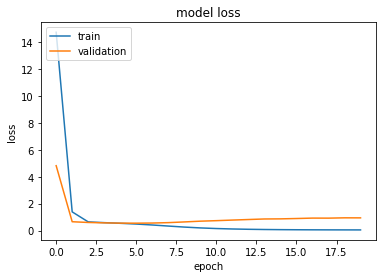

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **MLP-2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Coursera dataset (replace 'coursera_data.csv' with your dataset file)
data = pd.read_csv('merged_coursera_datase.csv')

# Assuming 'user_id' and 'item_id' are categorical features
categorical_features = ['user_id', 'course_id']

# Assuming 'sentiment' and 'course_difficulty' are continuous features
continuous_features = ['Sentiment', 'course_difficulty']

# Extract the labels (replace 'label_column' with your label column name)
labels = data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('rating', axis=1), labels, test_size=0.2, random_state=42)

# Define preprocessing for categorical and continuous features
# You can customize these preprocessing steps as needed
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', continuous_transformer, continuous_features)
    ])

# Create the preprocessed data using the preprocessing pipeline
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Ensure that you have NumPy arrays for the model
X_train_preprocessed = X_train_preprocessed.toarray()
X_test_preprocessed = X_test_preprocessed.toarray()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Assuming you've already prepared your data and labels
# X_train_preprocessed, X_test_preprocessed, y_train, y_test

# Define the MLP model for binary classification
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_preprocessed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(
    loss='mean_squared_error',  # Using mean squared error as the loss for regression
    optimizer=opt
)

# Train the model
model.fit(X_train_preprocessed, y_train, epochs=20, batch_size=512)

# Predict using the model
predictions = model.predict(X_test_preprocessed)

# Convert binary labels to continuous values (0 and 1)
y_test = y_test.to_numpy().reshape(-1)  # Convert to NumPy array and reshape
y_test_continuous = y_test.astype(float)

# Calculate RMSE and MAE
rmse = np.sqrt(np.mean((predictions - y_test_continuous) ** 2))
mae = np.mean(np.abs(predictions - y_test_continuous))

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


Epoch 1/20
32/32 [==============================] - 2s 45ms/step - loss: 14.3691
Epoch 2/20
32/32 [==============================] - 2s 47ms/step - loss: 13.2639
Epoch 3/20
32/32 [==============================] - 1s 44ms/step - loss: 13.2639
Epoch 4/20
32/32 [==============================] - 1s 45ms/step - loss: 13.2639
Epoch 5/20
32/32 [==============================] - 2s 73ms/step - loss: 13.2639
Epoch 6/20
32/32 [==============================] - 2s 49ms/step - loss: 13.2639
Epoch 7/20
32/32 [==============================] - 1s 42ms/step - loss: 13.2639
Epoch 8/20
32/32 [==============================] - 1s 44ms/step - loss: 13.2639
Epoch 9/20
32/32 [==============================] - 1s 44ms/step - loss: 13.2639
Epoch 10/20
32/32 [==============================] - 1s 43ms/step - loss: 13.2639
Epoch 11/20
32/32 [==============================] - 1s 44ms/step - loss: 13.2639
Epoch 12/20
32/32 [==============================] - 1s 45ms/step - loss: 13.2639
Epoch 13/20
32/32 [======

DeepFM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your Coursera dataset (replace 'coursera_data.csv' with your file)
data = pd.read_csv('merged_coursera_datase.csv')

# Define the feature columns and target
sparse_features = ['user_id', 'course_id']
dense_features = ['Sentiment', 'course_difficulty']
target = ['rating']

# Preprocess and label encode categorical features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[sparse_features + dense_features], data[target], test_size=0.2, random_state=42)

# Normalize dense features
scaler = StandardScaler()
X_train[dense_features] = scaler.fit_transform(X_train[dense_features])
X_test[dense_features] = scaler.transform(X_test[dense_features])

# Create a DeepFM-like model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train, y_train, batch_size=100, epochs=40, verbose=2, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test, batch_size=100)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Epoch 1/40
161/161 - 2s - loss: 73133.6641 - mean_squared_error: 73133.6641 - val_loss: 5.3523 - val_mean_squared_error: 5.3523 - 2s/epoch - 12ms/step
Epoch 2/40
161/161 - 1s - loss: 3.4625 - mean_squared_error: 3.4625 - val_loss: 3.1900 - val_mean_squared_error: 3.1900 - 757ms/epoch - 5ms/step
Epoch 3/40
161/161 - 1s - loss: 3.1845 - mean_squared_error: 3.1845 - val_loss: 3.2044 - val_mean_squared_error: 3.2044 - 849ms/epoch - 5ms/step
Epoch 4/40
161/161 - 1s - loss: 3.1912 - mean_squared_error: 3.1912 - val_loss: 3.2211 - val_mean_squared_error: 3.2211 - 1s/epoch - 7ms/step
Epoch 5/40
161/161 - 1s - loss: 3.1310 - mean_squared_error: 3.1310 - val_loss: 3.5557 - val_mean_squared_error: 3.5557 - 1s/epoch - 7ms/step
Epoch 6/40
161/161 - 2s - loss: 3.0964 - mean_squared_error: 3.0964 - val_loss: 3.0446 - val_mean_squared_error: 3.0446 - 2s/epoch - 10ms/step
Epoch 7/40
161/161 - 1s - loss: 2.9790 - mean_squared_error: 2.9790 - val_loss: 2.9248 - val_mean_squared_error: 2.9248 - 1s/epoch -